# First Deep Learning Model

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets.samples_generator import make_circles

In [3]:
I, j = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.05,
                    random_state=0)
len(I), len(j)

(1000, 1000)

In [4]:
X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.7,
                    random_state=0)

In [5]:
toDel = []
for i in range(len(I)):
    if j[i] == 0:
        toDel.append(i)
len(toDel), j.shape

(500, (1000,))

In [6]:
I = np.delete(I, toDel ,0)
j = np.delete(j, toDel)
j += 1

In [7]:
cir = np.vstack((X, I))
pos = np.concatenate((y, j), axis=0)

In [59]:
y.shape

(1000,)

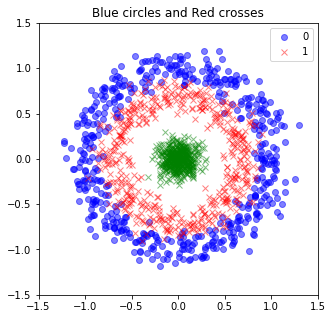

In [46]:
plt.figure(figsize=(5, 5))
plt.plot(cir[pos==0, 0], cir[pos==0, 1], 'ob', alpha=0.5)
plt.plot(cir[pos==1, 0], cir[pos==1, 1], 'xr', alpha=0.5)
plt.plot(cir[pos==2, 0], cir[pos==2, 1], 'xg', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [97]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [98]:
model = Sequential()

In [115]:
model.add(Dense(4, input_shape=(2,), activation='tanh'))

In [116]:
model.add(Dense(1, activation='sigmoid'))

In [117]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [118]:
model.fit(cir, pos, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 0s - loss: -3.1569 - acc: 0.3913     
Epoch 2/20
1500/1500 [==============================] - 0s - loss: -4.8147 - acc: 0.4547     
Epoch 3/20
1500/1500 [==============================] - 0s - loss: -4.2456 - acc: 0.4220     
Epoch 4/20
1500/1500 [==============================] - 0s - loss: -3.9251 - acc: 0.3787     
Epoch 5/20
1500/1500 [==============================] - 0s - loss: -4.8943 - acc: 0.4020     
Epoch 6/20
1500/1500 [==============================] - 0s - loss: -4.8913 - acc: 0.4073     
Epoch 7/20
1500/1500 [==============================] - 0s - loss: -4.8801 - acc: 0.4453     
Epoch 8/20
1500/1500 [==============================] - 0s - loss: -4.8988 - acc: 0.4167     
Epoch 9/20
1500/1500 [==============================] - 0s - loss: -4.8521 - acc: 0.3920     
Epoch 10/20
1500/1500 [==============================] - 0s - loss: -4.8635 - acc: 0.3900     
Epoch 11/20
1500/1500 [==============================] - 0s

In [119]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

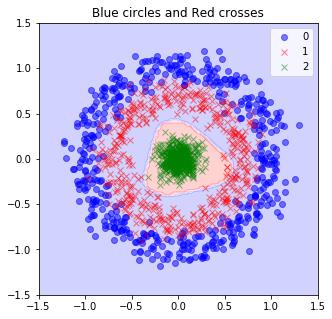

In [120]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(cir[pos==0, 0], cir[pos==0, 1], 'ob', alpha=0.5)
plt.plot(cir[pos==1, 0], cir[pos==1, 1], 'xr', alpha=0.5)
plt.plot(cir[pos==2, 0], cir[pos==2, 1], 'xg', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1', '2'])
plt.title("Blue circles and Red crosses")